### Initial belief

In [4]:
import numpy as np
N=10 #number of landmarks
width=3+2*N #width of the matrices
mu0= np.zeros([width,1],dtype=float)
sigma0= np.zeros([width,width],dtype=float)

for i in range(3,width):
    sigma0[i][i]=np.inf #high uncertainity 

y0 = np.zeros([width,1],dtype=float)
 

In [5]:
# control input
epsilon = 1E-9
vt= 2 # ms-1
wt = 0 +epsilon#rad s-1
ut= np.array(([vt],[wt]),dtype=float)
dt = 2
pos = [[0],
       [0],
       [0]
       ]
pos=np.array(pos,dtype=float)
def newPosition(pos,ut,dt):
    v=ut[0]
    w=ut[1]
    theta=pos[2][0]
    arr= [[v/w*np.sin(theta+w*dt)-v/w*np.sin(theta)],
          [-v/w*np.cos(theta+w*dt)+v/w*np.cos(theta)],
          [w*dt]]
    return pos+ np.array(arr,dtype=float)
print(newPosition(pos,ut,dt))

[[[4.e+00]
  [4.e+00]
  [4.e+00]]

 [[0.e+00]
  [0.e+00]
  [0.e+00]]

 [[2.e-09]
  [2.e-09]
  [2.e-09]]]


In [6]:
Fx = np.zeros([3,width],dtype=float)
Fx[np.diag_indices(3)]=1
Fx

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

In [7]:
yt_1 = y0 
yt=yt_1 + Fx.T@ newPosition(pos,ut,dt)
Rt= np.array([[epsilon,0,0],[0,epsilon,0],[0,0,epsilon]],dtype=float)
noise_sigma = Fx.T@Rt@Fx
noise_mu = 0
mu_t = np.add(yt , np.random.normal(noise_mu,noise_sigma,(width,width)))
mu_t 


array([[[ 4.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
          4.00000000e+00,  4.00000000e+00,  4.00000000e+00],
        [ 4.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
          4.00000000e+00,  4.00000000e+00,  4.00000000e+00],
        [ 4.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
          4.00000000e+00,  4.00000000e+00,  4.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-9.35990751e-10,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  8.76980735e-10,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [8]:
#Jacobian 
sigmat_1= sigma0

theta_1 = 0
p=np.zeros([3,3],dtype=float)
p[0][2]=vt/wt*np.cos(theta_1+wt*dt)-vt/wt*np.cos(theta_1)
p[1][2]=vt/wt*np.sin(theta_1+wt*dt)-vt/wt*np.sin(theta_1)
Gt = np.identity(width) + Fx.T@p@Fx
sigma_t = Gt@sigmat_1@Gt.T + noise_sigma
sigma_t

C:\Users\vakee\AppData\Local\Temp\ipykernel_11388\3595684939.py:9: RuntimeWarning: invalid value encountered in matmul
  sigma_t = Gt@sigmat_1@Gt.T + noise_sigma


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
   

In [9]:

map = ["++++++++++",
       "++++++++++",
       "++*+++++++",
       "++*+++++++",
       "******++++",
       "++*+++++++",
       "++++++++++",
       "++++++++++",
       "++++++++++",
       "++++++++++"]

print('\n'.join(map))

++++++++++
++++++++++
++*+++++++
++*+++++++
******++++
++*+++++++
++++++++++
++++++++++
++++++++++
++++++++++


In [10]:

curr_pos=(4,5)
map[curr_pos[0]][curr_pos[1]]


'*'

In [11]:

def findLandmark(curr_pos,RANGE = 3,MAP_WIDTH=10):
    """ 
            -y(3)
            A    
            |
    -x(2)<-- --> +x(0)   
            |
            v
            +y(1)   
    """
    land_arr=[]
    flag_collision =False
    for i in range(4):
        for j in range(RANGE):
            if (i==0):
                x=curr_pos[0]+(j+1)
                if x>MAP_WIDTH-1:
                    break
                y=curr_pos[1]
                theta = 0
            elif(i==2):
                x=curr_pos[0]-(j+1)
                if x<0:
                    break
                y=curr_pos[1]
                theta = np.pi  
            elif(i==1):
                x=curr_pos[0]  
                y=curr_pos[1]+(j+1)
                if y>MAP_WIDTH-1:
                    break
                theta = (np.pi)/2
            elif(i==3):
                x=curr_pos[0]  
                y=curr_pos[1]-(j+1)  
                if y<0:
                    break
                theta = 3/2*(np.pi)          
            
            if(map[y][x]=="*"):
                print("Landmark found at: (%i,%i) deg: %f"%(x,y,theta))
                land_arr.append((x,y))
                if(j==0):
                    if(x==curr_pos[0] and y==curr_pos[1]):
                        print("Collision at (%i,%i)! "%(x,y))
                        flag_collision=True

    return land_arr,flag_collision
print(findLandmark((2,4)))


Landmark found at: (3,4) deg: 0.000000
Landmark found at: (4,4) deg: 0.000000
Landmark found at: (5,4) deg: 0.000000
Landmark found at: (2,5) deg: 1.570796
Landmark found at: (1,4) deg: 3.141593
Landmark found at: (0,4) deg: 3.141593
Landmark found at: (2,3) deg: 4.712389
Landmark found at: (2,2) deg: 4.712389
([(3, 4), (4, 4), (5, 4), (2, 5), (1, 4), (0, 4), (2, 3), (2, 2)], False)


In [12]:
# def moveRobot(pos,MAP_WIDTH=10):
#     x=pos[0]+1
#     if x>MAP_WIDTH-1:
#         x=MAP_WIDTH
#     y=pos[1]+1
#     if y>MAP_WIDTH-1:
#         y=MAP_WIDTH
#     pos=(pos[0]+1,pos[1])
#     land_arr,coll = findLandmark(pos)
#     if col
            
# moveRobot((4,6))

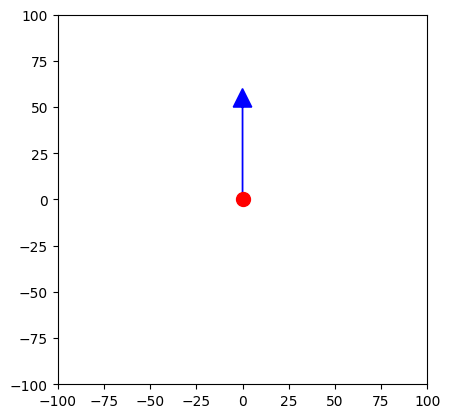

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to draw robot pose on a blank figure
def draw_robot_pose(pose):
    # Create a new figure
    plt.figure()

    # Extract pose components
    x, y, theta = pose

    # Plot robot position
    plt.plot(x, y, 'ro', markersize=10)  # Red dot for robot position

    # Plot robot orientation arrow
    arrow_length = 50
    arrow_dx = arrow_length * np.cos(theta)
    arrow_dy = arrow_length * np.sin(theta)
    plt.arrow(x, y, arrow_dx, arrow_dy, head_width=10, head_length=10, fc='blue', ec='blue')

    # Set axis limits
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

    # Set aspect ratio to equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Show plot
    plt.show()

# Example pose (x, y, theta)
pose = (0, 0, np.pi/2)  # Example pose at (0, 0) with orientation of 45 degrees (pi/4 radians)

# Draw robot pose on a blank figure
draw_robot_pose(pose)


In [14]:
#sensor measurement
def sensorReading(robo_pos,land_pos,R_NOISE_STD=0.01,T_NOISE_STD=0.001):
    robo_x,robo_y,robo_theta = robo_pos
    land_x,land_y= land_pos
    return np.sqrt((land_x-robo_x)**2+(land_y-robo_y)**2)+np.random.normal(0,R_NOISE_STD), np.arctan2((land_y-robo_y),(land_x-robo_x))-robo_theta+ +np.random.normal(0,T_NOISE_STD)

In [15]:
landmark_dic={}
def landmarkId(land_pos):
    is_new = False
    if (landmark_dic.get(land_pos)==None):
        is_new = True
        landmark_dic[land_pos] = len(landmark_dic)
    return landmark_dic.get(land_pos)+3, is_new
    

In [19]:
land_marks,_=findLandmark((4,4))
robo_pos = (4,4,0)
R_NOISE_STD = 0.01
T_NOISE_STD = 0.001
for land_mark in land_marks:
    print(land_mark)
    ht_j=np.zeros([2,5],dtype=float)


    j,is_new_land_mark=landmarkId(land_mark)
    print(j,is_new_land_mark)

    #sensor data simulation
    robo_x,robo_y,robo_theta = robo_pos
    land_x,land_y= land_mark
    delta_x = land_x-robo_x
    delta_y = land_y-robo_y
    q= (delta_x**2+delta_y**2)+np.random.normal(0,R_NOISE_STD)
    sqrt_q=np.sqrt(q)
    delta_theta=np.arctan2((land_y-robo_y),(land_x-robo_x))-robo_theta+ +np.random.normal(0,T_NOISE_STD)

    #Fx_j implementation
    Fx_j=np.zeros([5,width],dtype=float)
    Fx_j[3][2*j+2] = 1
    Fx_j[4][2*j+3] = 1
    for i in range(3):
        Fx_j[i][i] = 1
    #Hj jacobian
    hj= np.zeros([2,5],dtype=float)
    hj[0][0]=-1*sqrt_q*delta_x
    hj[0][1]=-1*sqrt_q*delta_y
    hj[0][3]= sqrt_q*delta_x
    hj[0][4]= sqrt_q*delta_y

    hj[1][0]= delta_y
    hj[1][1]= -1*delta_x
    hj[1][2]= -1*q
    hj[1][3]= -1*delta_y
    hj[1][4]= delta_x

    Hj= 1/q*hj@Fx_j

    # Kalman gain
    K = sigma_t@Hj.T@np.linalg.inv(Hj@sigma_t@Hj.T ) # add Qt
    
    # Update state estimate
    #mu_t = mu_t + K@(measurement - expected_measurement)
    
    # Update covariance
    sigma_t = (np.identity(width) - K@Hj)@sigma_t

print(sigma_t)

    
    

    
    
    


Landmark found at: (5,4) deg: 0.000000
Landmark found at: (3,4) deg: 3.141593
Landmark found at: (2,4) deg: 3.141593
Landmark found at: (1,4) deg: 3.141593
(5, 4)
3 False
(3, 4)
4 False
(2, 4)
5 False
(1, 4)
6 False
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan]
 [nan na

In [ ]:
def findLandmark(curr_pos,RANGE = 3,MAP_WIDTH=10):
    """ 
            -y(3)
            A    
            |
    -x(2)<-- --> +x(0)   
            |
            v
            +y(1)   
    """
    land_arr=[]
    flag_collision =False
    for i in range(4):
        for j in range(RANGE):
            if (i==0):
                x=curr_pos[0]+(j+1)
                if x>MAP_WIDTH-1:
                    break
                y=curr_pos[1]
                theta = 0
            elif(i==2):
                x=curr_pos[0]-(j+1)
                if x<0:
                    break
                y=curr_pos[1]
                theta = np.pi  
            elif(i==1):
                x=curr_pos[0]  
                y=curr_pos[1]+(j+1)
                if y>MAP_WIDTH-1:
                    break
                theta = (np.pi)/2
            elif(i==3):
                x=curr_pos[0]  
                y=curr_pos[1]-(j+1)  
                if y<0:
                    break
                theta = 3/2*(np.pi)          
            
            if(map[y][x]=="*"):
                print("Landmark found at: (%i,%i) deg: %f"%(x,y,theta))
                land_arr.append((x,y))
                if(j==0):
                    if(x==curr_pos[0] and y==curr_pos[1]):
                        print("Collision at (%i,%i)! "%(x,y))
                        flag_collision=True

    return land_arr,flag_collision


In [ ]:
def newPosition(pos,ut,dt):
    v=ut[0]
    w=ut[1]
    theta=pos[2][0]
    arr= [[v/w*np.sin(theta+w*dt)-v/w*np.sin(theta)],
          [-v/w*np.cos(theta+w*dt)+v/w*np.cos(theta)],
          [w*dt]]
    return pos+ np.array(arr,dtype=float)

In [ ]:
def landmarkId(land_pos):
    is_new = False
    if (landmark_dic.get(land_pos)==None):
        is_new = True
        landmark_dic[land_pos] = len(landmark_dic)
    return landmark_dic.get(land_pos)+3, is_new

In [ ]:
def predict():
    

In [ ]:
def update():
    land_marks,_=findLandmark((4,4))
    robo_pos = (4,4,0)
    R_NOISE_STD = 0.01
    T_NOISE_STD = 0.001
    for land_mark in land_marks:
        print(land_mark)
        ht_j=np.zeros([2,5],dtype=float)


        j,is_new_land_mark=landmarkId(land_mark)
        print(j,is_new_land_mark)

        #sensor data simulation
        robo_x,robo_y,robo_theta = robo_pos
        land_x,land_y= land_mark
        delta_x = land_x-robo_x
        delta_y = land_y-robo_y
        q= (delta_x**2+delta_y**2)+np.random.normal(0,R_NOISE_STD)
        sqrt_q=np.sqrt(q)
        delta_theta=np.arctan2((land_y-robo_y),(land_x-robo_x))-robo_theta+ +np.random.normal(0,T_NOISE_STD)

        #Fx_j implementation
        Fx_j=np.zeros([5,width],dtype=float)
        Fx_j[3][2*j+2] = 1
        Fx_j[4][2*j+3] = 1
        for i in range(3):
            Fx_j[i][i] = 1
        #Hj jacobian
        hj= np.zeros([2,5],dtype=float)
        hj[0][0]=-1*sqrt_q*delta_x
        hj[0][1]=-1*sqrt_q*delta_y
        hj[0][3]= sqrt_q*delta_x
        hj[0][4]= sqrt_q*delta_y

        hj[1][0]= delta_y
        hj[1][1]= -1*delta_x
        hj[1][2]= -1*q
        hj[1][3]= -1*delta_y
        hj[1][4]= delta_x

        Hj= 1/q*hj@Fx_j

        # Kalman gain
        K = sigma_t@Hj.T@np.linalg.inv(Hj@sigma_t@Hj.T ) # add Qt
        
        # Update state estimate
        #mu_t = mu_t + K@(measurement - expected_measurement)
        
        # Update covariance
        sigma_t = (np.identity(width) - K@Hj)@sigma_t

In [ ]:
# Define initial state and covariance
import numpy as np

map = ["++++++++++",
       "++++++++++",
       "++*+++++++",
       "++*+++++++",
       "******++++",
       "++*+++++++",
       "++++++++++",
       "++++++++++",
       "++++++++++",
       "++++++++++"]

# print('\n'.join(map))
landmark_dic={}
N=10 #number of landmarks
width=3+2*N #width of the matrices

# mu0= np.zeros([width,1],dtype=float)
sigma_t= np.zeros([width,width],dtype=float)
for i in range(3,width):
    sigma_t[i][i]=np.inf #high uncertainity 


# control input
epsilon = 1E-9
vt= 2 # ms-1
wt = 0 +epsilon#rad s-1
ut= np.array(([vt],[wt]),dtype=float)
dt = 2
pos = [[0],
       [0],
       [0]
       ]
pos=np.array(pos,dtype=float)

def predict(pos,ut,):
    Fx = np.zeros([3,width],dtype=float)
    Fx[np.diag_indices(3)]=1
    yt=np.zeros([width,1],dtype=float) + Fx.T@ newPosition(pos,ut,dt)
    Rt= np.array([[epsilon,0,0],[0,epsilon,0],[0,0,epsilon]],dtype=float)
    noise_sigma = Fx.T@Rt@Fx
    noise_mu = 0
    mu_t = np.add(yt , np.random.normal(noise_mu,noise_sigma,(width,width)))

    #Jacobian 
    theta_1 = pos[2][0]
    p=np.zeros([3,3],dtype=float)
    p[0][2]=vt/wt*np.cos(theta_1+wt*dt)-vt/wt*np.cos(theta_1)
    p[1][2]=vt/wt*np.sin(theta_1+wt*dt)-vt/wt*np.sin(theta_1)
    Gt = np.identity(width) + Fx.T@p@Fx
    sigma_t = Gt@sigmat_1@Gt.T + noise_sigma

    return mu_t, sigma_t




# Main SLAM loop
for each timestep:
    # Prediction step
    def predict(mu, Sigma, control_input):
        # Implement motion model to predict next state
        # For example, if using a simple kinematic model:
        # mu = motion_model(mu, control_input)
        # Jacobian of motion model
        # G = compute_motion_jacobian(mu, control_input)
        # Covariance propagation
        # Sigma = G * Sigma * G.T + motion_noise_covariance
        return mu, Sigma

    # Update step
    if sensor_data_available:
        update(mu, Sigma, sensor_data)

# Final estimated robot pose and map
final_robot_pose = mu
final_map = current_map
